<h1>Fundamentals of Data Science</h1>

<h2>Assignment 1</h2>

**GOAL** In this notebook we are going to cover the following practical aspects of data science:

- Reading a csv file and loading it to a dataframe in python using pandas library
- Filtering out the required columns in the dataframe
- Summarising data based on the fields. Ex: Summing up all the rows corresponding to a certain entry in the dataset
- Plot shape of United States using the geographic data i.e. data with all the coordinates
- Scale and move the states using data of the coordinates
- Colour the states based on the average age of their population

To complete this assignment you need to have a running Anaconda installation with Python 2.7 on your device. Python package prerequisites include:
+  **Python Data Analysis Library** [Pandas](https://pandas.pydata.org/pandas-docs/stable/install.html)  
+  **GDAL - Geospatial Data Abstraction Library ** [GDAL](http://www.gdal.org/index.html)   



**Pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

Pandas is well suited for many different kinds of data:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. 

In [4]:
# Import all the libraries required
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon

<h3>A look at the data</h3>
Throughout this assignment, the dataset that we would be using will be the US population statistics 2010-2016. It can be downloaded from https://www2.census.gov/programs-surveys/popest/datasets/2010-2016/state/asrh/.

As a first step, we will structure the data into a pandas DataFrame to simplify the data manipulation. We will start by loading the csv file of data into a DataFrame called population_data and we will then filter columns based on our use. *Take a look at the data and its fields*

In [5]:
population_data = pd.read_csv('sc-est2016-agesex-civ.csv')
# For viewing the complete dataset
population_data

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV
0,10,0,0,0,United States,0,0,3944160,3951400,3963239,3926677,3931346,3955374,3975414,3970145
1,10,0,0,0,United States,0,1,3978090,3957847,3966617,3978101,3943114,3950083,3974980,3995008
2,10,0,0,0,United States,0,2,4096939,4090856,3971363,3980016,3992752,3959663,3967361,3992154
3,10,0,0,0,United States,0,3,4119051,4111929,4102483,3982920,3992660,4006960,3974468,3982074
4,10,0,0,0,United States,0,4,4063186,4077557,4122286,4112795,3994261,4005464,4020276,3987656
5,10,0,0,0,United States,0,5,4056872,4064668,4087725,4132182,4123377,4006157,4017851,4032515
6,10,0,0,0,United States,0,6,4066412,4073030,4075014,4097594,4142405,4134879,4018078,4029655
7,10,0,0,0,United States,0,7,4030594,4043061,4083248,4084860,4107844,4153950,4146894,4029991
8,10,0,0,0,United States,0,8,4046497,4025611,4053203,4093177,4095312,4119668,4166268,4159114
9,10,0,0,0,United States,0,9,4148369,4125437,4035726,4063137,4103576,4107164,4132039,4178524


In [9]:
population_data.shape

(13572, 15)

The complete dataset has 13,572 rows and 15 columns. It can be verified by looking at the shape of your dataframe by <i>population_data.shape</i>. To select specific columns, create a list of column names and view the dataframe as:

In [6]:
# Filtering the data by the columns ['NAME','SEX','AGE','POPEST2016_CIV']
population_data[['NAME','SEX','AGE','POPEST2016_CIV']]

,NAME,SEX,AGE,POPEST2016_CIV
0,United States,0,0,3970145
1,United States,0,1,3995008
2,United States,0,2,3992154
3,United States,0,3,3982074
4,United States,0,4,3987656
5,United States,0,5,4032515
6,United States,0,6,4029655
7,United States,0,7,4029991
8,United States,0,8,4159114
9,United States,0,9,4178524


In [7]:
# Filters out data for all sexes and all age group and store in a new dataframe 'population_data_all'
population_data_all = population_data[population_data['SEX']==0]
population_data_all = population_data_all[population_data_all['AGE']!=999]

In [48]:
population_data_all

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV
0,10,0,0,0,United States,0,0,3944160,3951400,3963239,3926677,3931346,3955374,3975414,3970145
1,10,0,0,0,United States,0,1,3978090,3957847,3966617,3978101,3943114,3950083,3974980,3995008
2,10,0,0,0,United States,0,2,4096939,4090856,3971363,3980016,3992752,3959663,3967361,3992154
3,10,0,0,0,United States,0,3,4119051,4111929,4102483,3982920,3992660,4006960,3974468,3982074
4,10,0,0,0,United States,0,4,4063186,4077557,4122286,4112795,3994261,4005464,4020276,3987656
5,10,0,0,0,United States,0,5,4056872,4064668,4087725,4132182,4123377,4006157,4017851,4032515
6,10,0,0,0,United States,0,6,4066412,4073030,4075014,4097594,4142405,4134879,4018078,4029655
7,10,0,0,0,United States,0,7,4030594,4043061,4083248,4084860,4107844,4153950,4146894,4029991
8,10,0,0,0,United States,0,8,4046497,4025611,4053203,4093177,4095312,4119668,4166268,4159114
9,10,0,0,0,United States,0,9,4148369,4125437,4035726,4063137,4103576,4107164,4132039,4178524


In [8]:
# Sum the population of each state for each year on the dataset 'population_data_all'
population_data_all.groupby(by=['NAME'], as_index=False)[['POPEST2010_CIV','POPEST2011_CIV','POPEST2012_CIV',
                                        'POPEST2013_CIV','POPEST2014_CIV','POPEST2015_CIV','POPEST2016_CIV']].sum()

,NAME,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV
0,Alabama,4769452,4784435,4800307,4814150,4828303,4840221,4849650
1,Alaska,691795,703665,710107,713284,714590,715690,720195
2,Arizona,6386391,6445831,6529632,6604092,6700353,6799510,6911889
3,Arkansas,2914830,2932921,2944129,2951923,2960138,2972327,2982997
4,California,37181550,37523842,37858037,38179112,38527672,38838074,39091453
5,Colorado,5015266,5084214,5155136,5231277,5313456,5414058,5506673
6,Connecticut,3571370,3582516,3586255,3587571,3584273,3577428,3568865
7,Delaware,895917,904087,913124,921241,931071,940520,948534
8,District of Columbia,602064,617476,632275,645847,655509,666607,677292
9,Florida,18776632,19030781,19276416,19510904,19819077,20176496,20542033


<h3> Installations </h3>
GDAL - Geospatial Data Abstraction Library <br>
    http://www.gdal.org/index.html

For example,
** On Linux Fedora:** 
         <ul><i>yum install libpng</i>   
         <i> yum install libtiff </i>  
         <i> sudo dnf install gdal gdal-devel</i><br>
         
** In Ubuntu:**
         <ul><i>sudo add-apt-repository ppa:ubuntugis/ppa && sudo apt-get update</i>   
         <i> sudo apt-get install gdal-bin </i>  
         <i> To verify after installation, try: $ ogrinfo</i><br>
         <i> If the installation was successful, you will see something like this:

+ Usage: ogrinfo [--help-general] [-ro] [-q] [-where restricted_where]
               [-spat xmin ymin xmax ymax] [-fid fid]
               [-sql statement] [-al] [-so] [-fields={YES/NO}]
               [-geom={YES/NO/SUMMARY}][--formats]
               datasource_name [layer [layer ...]]
</i><br>
        
                  

**In Windows:**
         Refer to https://sandbox.idre.ucla.edu/sandbox/tutorials/installing-gdal-for-windows

<h3> Get a US states shapefile </h3>        
Sources
- ArcGIS shapefile of US 50 states + DC (https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5)
<ul>
Recommended – convert to GeoJSON    
(<i> ogr2ogr  -f  GeoJSON  [name1].geojson  [name2].shp </i> - where, 'name2' is the name of the downloaded shp file and 'name1' is the name you want to specify for the geoJSON file)

In [18]:
#S_DIR is the directory in which your converted name2.shp file is located 
S_DIR = 'states_21basic/' 

BLUE = '#5599ff'

with open(os.path.join(S_DIR, 'states.geojson')) as rf:    
    data = json.load(rf)

fig = plt.figure() 
ax = fig.gca()

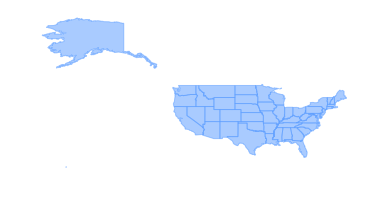

In [14]:
for feature in data['features']:
    geometry = feature['geometry']
    if geometry['type'] == 'Polygon':
        poly = geometry
        ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE,  alpha=0.5, zorder=2))
    else:
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2))

ax.axis('scaled')
plt.axis('off')
plt.show()

**TASKS** <font color="red">
<h3> Improve the map </h3>
- Try a different projection (example: US Census Bureau shapefile)
- Scale and move Alaska 
- Increase the size of Hawaii
- Color the map based on the average age of each state for the year 2016 
    - Example: for average age between 65-70 years color the states in maroon, for 60-65 years in red and so on

<font color="blue">
Something else: <b> Matplotlib Basemap Toolkit </b> <br>
Even more: <b> GeoPandas </b>

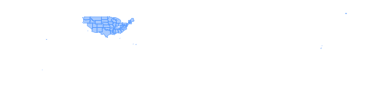

In [9]:
#Different projection

S_DIR = 'states_21basic/' 

BLUE = '#5599ff'

with open(os.path.join(S_DIR, 'tiger.geojson')) as rf: #US Census states (and equivalent) boundaries
    new_data = json.load(rf)

fig = plt.figure() 
ax = fig.gca()

for feature in new_data['features']:
    geometry = feature['geometry']
    if geometry['type'] == 'Polygon':
        poly = geometry
        ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE,  alpha=0.5, zorder=2))
    else:
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2))

ax.axis('scaled')
plt.axis('off')
plt.show()

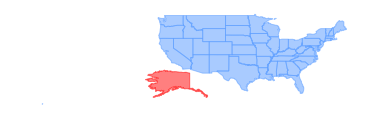

In [34]:
import shapely

S_DIR = 'states_21basic/' 

BLUE = '#5599ff'
RED = '#FF0000'

with open(os.path.join(S_DIR, 'states.geojson')) as rf:    
    data = json.load(rf)

fig = plt.figure() 
ax = fig.gca()

for feature in data['features']:
    geometry = feature['geometry']
    if geometry['type'] == 'Polygon':
        poly = geometry
        ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE,  alpha=0.5, zorder=2))
    #Scale and move Alaska
    elif feature['properties']['STATE_NAME'] == 'Alaska':
        AK_geo = feature['geometry']
        for polygon in AK_geo['coordinates'][0]:
            for xycor in polygon: #moving it
                xycor[0] += 30
                xycor[1] -= 35
            poly = shapely.affinity.scale(Polygon(polygon), xfact=0.5, yfact=0.5) #scaling it
            ax.add_patch(PolygonPatch(poly, fc=RED, ec=RED, alpha=0.5, zorder=2))
    else:
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2))
    

ax.axis('scaled')
plt.axis('off')
plt.show()

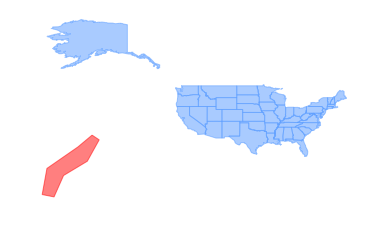

In [11]:
import shapely

S_DIR = 'states_21basic/' 

BLUE = '#5599ff'

with open(os.path.join(S_DIR, 'states.geojson')) as rf:    
    data = json.load(rf)

fig = plt.figure() 
ax = fig.gca()

for feature in data['features']:
    geometry = feature['geometry']
    if geometry['type'] == 'Polygon':
        poly = geometry
        ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE,  alpha=0.5, zorder=2))
    #Increase the size of Hawaii
    elif feature['properties']['STATE_NAME'] == 'Hawaii':
        HI_geo = feature['geometry']
        for polygon in HI_geo['coordinates'][0]:
            poly = shapely.affinity.scale(Polygon(polygon), xfact=100, yfact=100)
            ax.add_patch(PolygonPatch(poly, fc=RED, ec=RED, alpha=0.5, zorder=2))
    else:
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2))
    

ax.axis('scaled')
plt.axis('off')
plt.show()

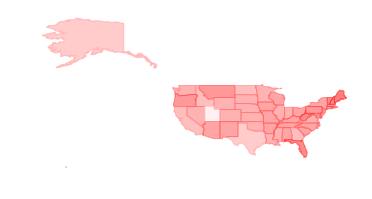

In [10]:
#Color the map based on the average age of each state for the year 2016

##Getting the (weighted) average age for the year 2016 for each state
df = population_data_all.groupby(by=['NAME', 'AGE'], as_index=False)[['POPEST2016_CIV']].sum()
df['total_weighted_age'] = df['AGE']*df['POPEST2016_CIV']
state_stats = df.groupby('NAME', as_index=False).sum()
state_stats['weighted_average_age'] = state_stats['total_weighted_age'] / state_stats['POPEST2016_CIV']
state_average_age = state_stats[['NAME', 'weighted_average_age']].sort_values(['weighted_average_age'])
state_average_age.set_index('NAME', inplace=True)

##Convert number to hex color
colors = {33:'#ffe5e5', 34:'#ffcccc', 35:'#ffb2b2', 36:'#ff9999', 37:'#ff7f7f', 38:'#ff6666', 39:'#ff4c4c', 40:'#ff3232',
          41:'#ff1919', 42:'#ff0000'}

##Creating a map
#S_DIR is the directory in which your converted name2.shp file is located 
S_DIR = 'states_21basic/' 

with open(os.path.join(S_DIR, 'states.geojson')) as rf:    
    data = json.load(rf)

fig = plt.figure() 
ax = fig.gca()

for feature in data['features']:
    state_name = feature['properties']['STATE_NAME']
    avg_age = state_average_age['weighted_average_age'][state_name]
    rel_color = colors[int(round(avg_age))]
   
    geometry = feature['geometry']
    if geometry['type'] == 'Polygon':
        poly = geometry
        ax.add_patch(PolygonPatch(poly, fc=rel_color, ec=rel_color,  alpha=0.5, zorder=2))
    else:
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ax.add_patch(PolygonPatch(poly, fc=rel_color, ec=rel_color, alpha=0.5, zorder=2))

ax.axis('scaled')
plt.axis('off')
plt.show()

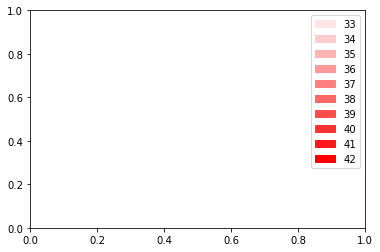

In [11]:
#Creating a legend of the color scheme (for iilustrative reasons)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

colors = {33:'#ffe5e5', 34:'#ffcccc', 35:'#ffb2b2', 36:'#ff9999', 37:'#ff7f7f', 38:'#ff6666', 39:'#ff4c4c', 40:'#ff3232',
          41:'#ff1919', 42:'#ff0000'}

handles = []
for age in colors:
    handles.append(mpatches.Patch(color=colors[age], label=str(age)))

plt.legend(handles=handles)
plt.show()

<font color="black">
<h3> Assignment </h3>

This assignment should result in a report in the format as mentioned in blackboard. 

<h4>The deadline for the assignment is <u> <font color="red"> **13-09-2017 23:59PM CEST. **</u> </h4>
